In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("csarron_test.xlsx")

In [3]:
df.drop(columns = "Unnamed: 0",inplace = True)
df["true_answer"] = df["true_answer"].apply(lambda x: x.lower())
df["answer_pred"] = df["answer_pred"].apply(lambda x: x.lower())
df

,tweet,question,true_answer,answer_pred
0,"Our prayers are with the students, educators &...",at which school were first responders on the s...,independence high school,independence high school
1,I can finally say it out loud and proud: I'm g...,what website is linked in the tweet?,instagram,lupita nyong'o
2,KAINE IS ABLE!!!— Cory Booker (@CoryBooker) Ju...,when does he say kaine is able?,"5:09 pm- jul 22, 2016.","july 23, 2016"
3,Cassini showed us the beauty of Saturn. It rev...,what is up to us to keep doing?,exploring,exploring
4,"Nicki your video was just you twerking, I see ...",where can you see girls doing that?,at the bar,at the bar every fri&sat
...,...,...,...,...
10687,President Obama will go down as perhaps the wo...,who was perhaps the worst president of the uni...,president obama,president obama
10688,It happens to the best of us @ Jessica Simpson...,what does happen to us?,"our best, whole foods",it happens to the best of us
10689,"A ""No Swimming"" sign does not mean ""Beware of ...",what event was the tweet inspired by?,disney gator attack,"no swimming"" sign does not mean ""beware of all..."
10690,Environmental Racism + Indifference = Lead in ...,what month was this tweet posted?,january,"january 24, 2016"


In [4]:
import jellyfish
df["jaro_similarity"] = df.apply(lambda x: jellyfish.jaro_similarity(x.true_answer,x.answer_pred),axis=1)
df["jaro_winkler_similarity"] = df.apply(lambda x: jellyfish.jaro_winkler_similarity(x.true_answer,x.answer_pred),axis=1)
df["levenshtein_distance"] = df.apply(lambda x: jellyfish.levenshtein_distance(x.true_answer,x.answer_pred),axis=1)
df["hamming_distance"] = df.apply(lambda x: jellyfish.hamming_distance(x.true_answer,x.answer_pred),axis=1)
df

,tweet,question,true_answer,answer_pred,jaro_similarity,jaro_winkler_similarity,levenshtein_distance,hamming_distance
0,"Our prayers are with the students, educators &...",at which school were first responders on the s...,independence high school,independence high school,1.000000,1.000000,0,0
1,I can finally say it out loud and proud: I'm g...,what website is linked in the tweet?,instagram,lupita nyong'o,0.570899,0.570899,12,14
2,KAINE IS ABLE!!!— Cory Booker (@CoryBooker) Ju...,when does he say kaine is able?,"5:09 pm- jul 22, 2016.","july 23, 2016",0.660839,0.660839,12,20
3,Cassini showed us the beauty of Saturn. It rev...,what is up to us to keep doing?,exploring,exploring,1.000000,1.000000,0,0
4,"Nicki your video was just you twerking, I see ...",where can you see girls doing that?,at the bar,at the bar every fri&sat,0.805556,0.883333,14,14
...,...,...,...,...,...,...,...,...
10687,President Obama will go down as perhaps the wo...,who was perhaps the worst president of the uni...,president obama,president obama,1.000000,1.000000,0,0
10688,It happens to the best of us @ Jessica Simpson...,what does happen to us?,"our best, whole foods",it happens to the best of us,0.555556,0.555556,20,26
10689,"A ""No Swimming"" sign does not mean ""Beware of ...",what event was the tweet inspired by?,disney gator attack,"no swimming"" sign does not mean ""beware of all...",0.480442,0.480442,43,52
10690,Environmental Racism + Indifference = Lead in ...,what month was this tweet posted?,january,"january 24, 2016",0.812500,0.887500,9,9


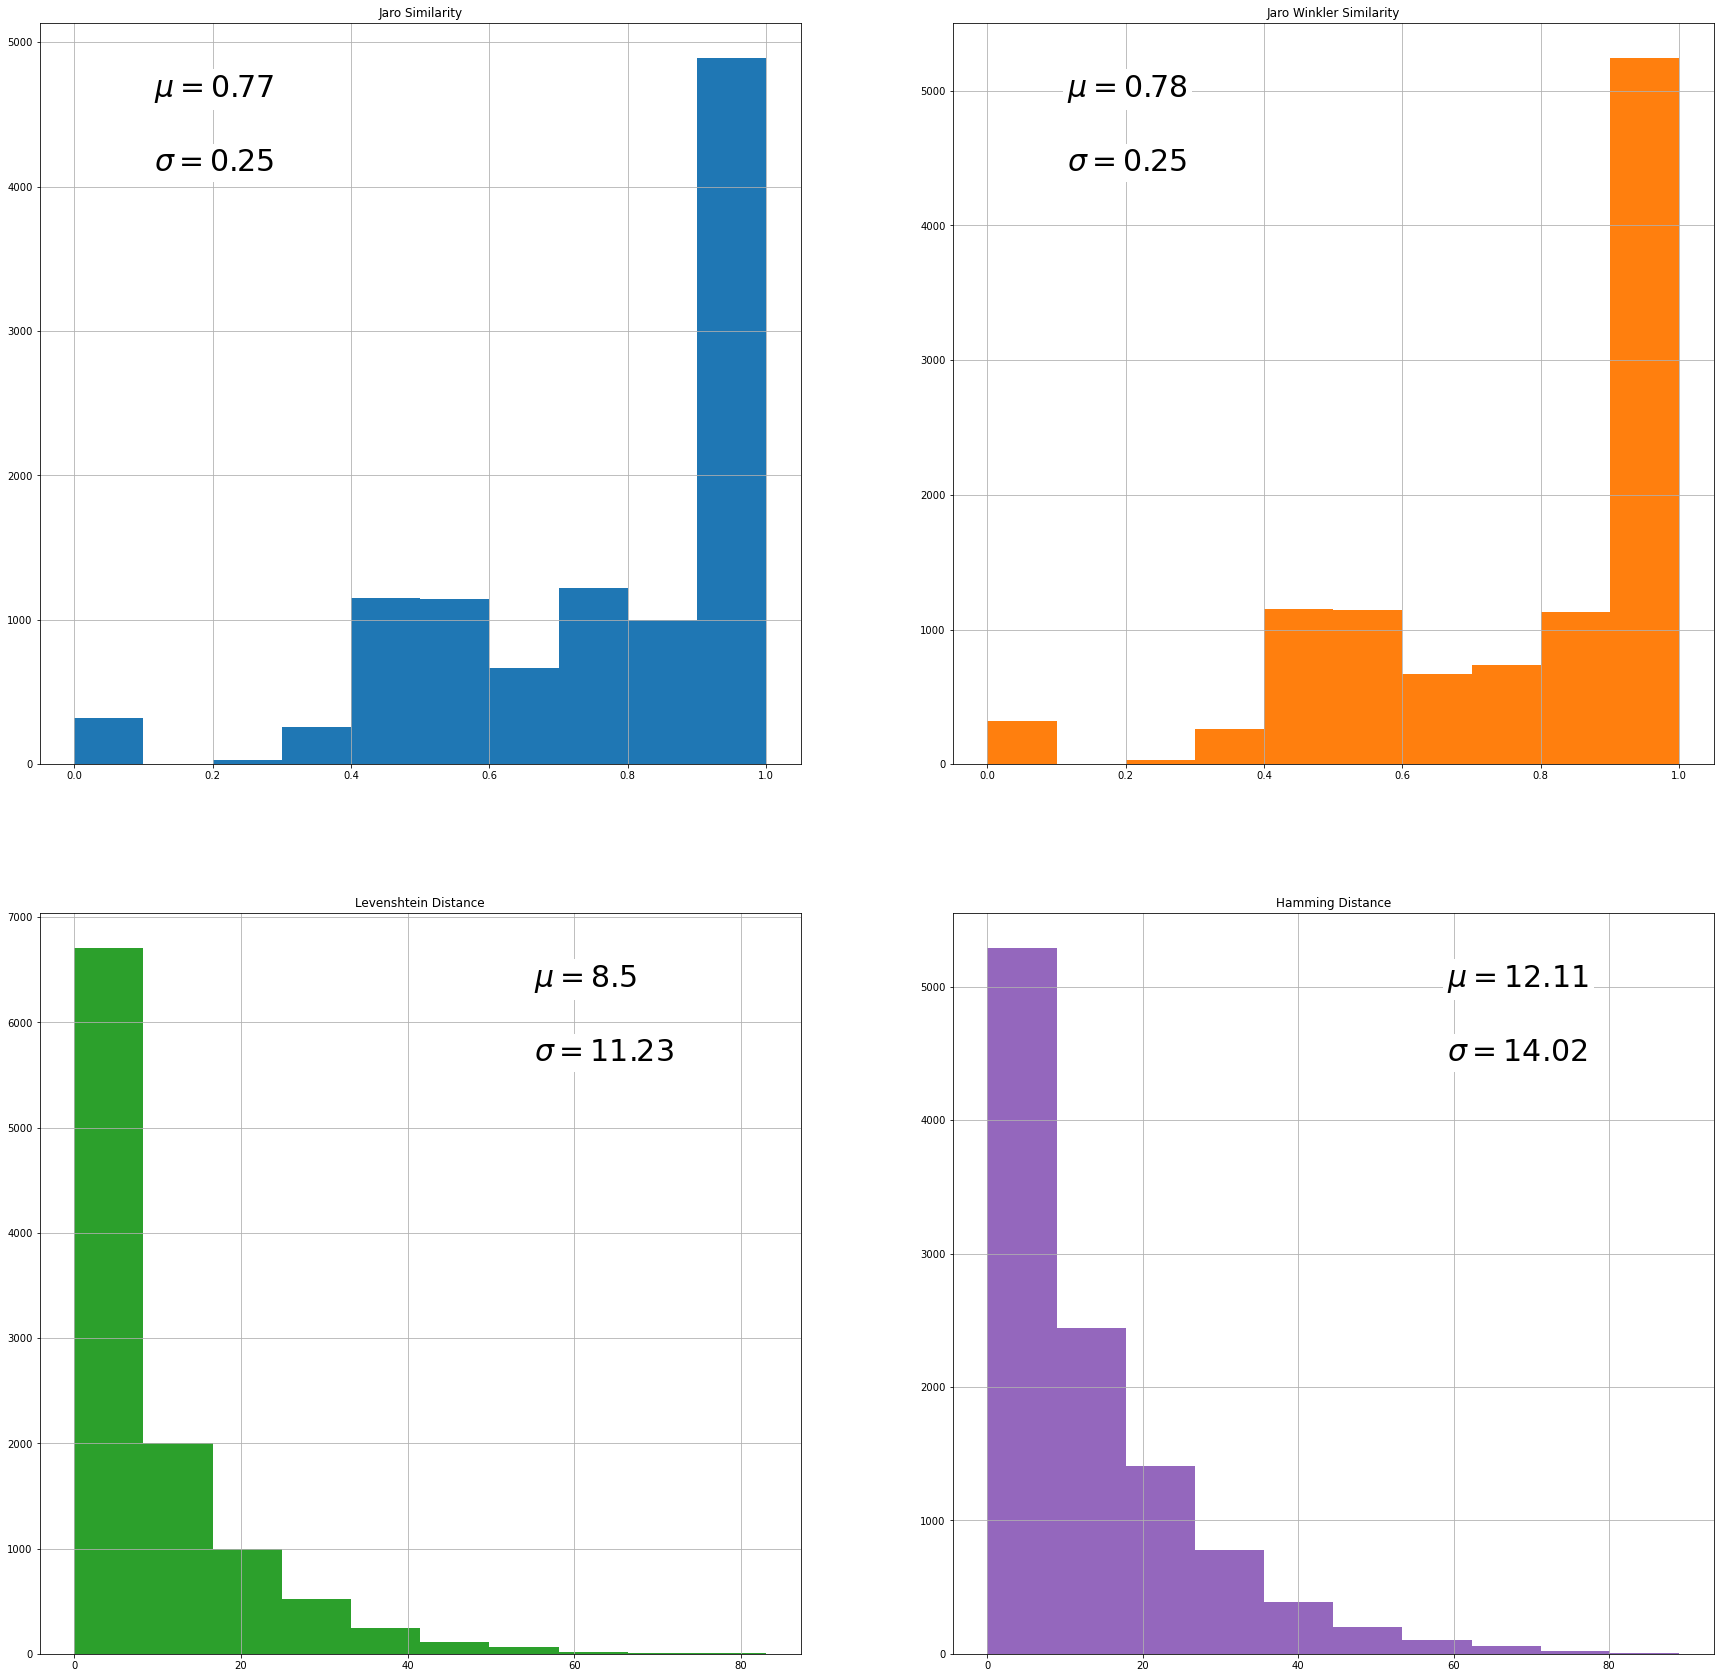

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2,figsize=(30,30))
params = {'axes.titlesize':'26',
          'xtick.labelsize':'30',
          'ytick.labelsize':'30'}

df["jaro_similarity"].hist(ax = axs[0,0])
df["jaro_winkler_similarity"].hist(ax = axs[0,1], color = 'tab:orange')
df["levenshtein_distance"].hist(ax = axs[1,0], color = 'tab:green')
df["hamming_distance"].hist(ax = axs[1,1], color = 'tab:purple')


axs[0,0].set_title("Jaro Similarity")
axs[0,1].set_title("Jaro Winkler Similarity")
axs[1,0].set_title("Levenshtein Distance")
axs[1,1].set_title("Hamming Distance")

axs[0,0].text(0.15, 0.9,f'$\\mu = {round(df["jaro_similarity"].mean(),2)}$', fontsize=30, transform=axs[0,0].transAxes,backgroundcolor="white")
axs[0,0].text(0.15, 0.8,f'$\\sigma = {round(df["jaro_similarity"].std(),2)}$', fontsize=30, transform=axs[0,0].transAxes,backgroundcolor="white")
axs[0,1].text(0.15, 0.9,f'$\\mu = {round(df["jaro_winkler_similarity"].mean(),2)}$', fontsize=30, transform=axs[0,1].transAxes,backgroundcolor="white")
axs[0,1].text(0.15, 0.8,f'$\\sigma = {round(df["jaro_winkler_similarity"].std(),2)}$', fontsize=30, transform=axs[0,1].transAxes,backgroundcolor="white")
axs[1,0].text(0.65, 0.9,f'$\\mu = {round(df["levenshtein_distance"].mean(),2)}$', fontsize=30, transform=axs[1,0].transAxes,backgroundcolor="white")
axs[1,0].text(0.65, 0.8,f'$\\sigma = {round(df["levenshtein_distance"].std(),2)}$', fontsize=30, transform=axs[1,0].transAxes,backgroundcolor="white")
axs[1,1].text(0.65, 0.9,f'$\\mu = {round(df["hamming_distance"].mean(),2)}$', fontsize=30, transform=axs[1,1].transAxes,backgroundcolor="white")
axs[1,1].text(0.65, 0.8,f'$\\sigma = {round(df["hamming_distance"].std(),2)}$', fontsize=30, transform=axs[1,1].transAxes,backgroundcolor="white")

plt.rcParams.update(params)


<AxesSubplot:>

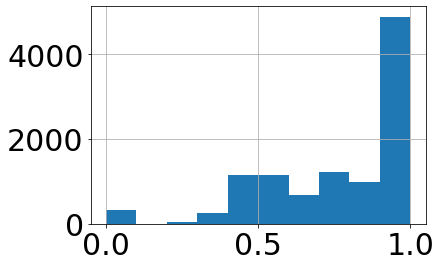

In [6]:
df["jaro_similarity"].hist()